
<br>

<br>

## Principal Components Analysis (PCA)

**heptathlon data (Olympic Heptathlon Seoul 1988)**

The first combined Olympic event for women was the pentathlon, first held in Germany in 1928. Initially this consisted of the shot putt, long jump, 100m, high jump and javelin events held over two days. The pentathlon was first introduced into the Olympic Games in 1964, when it consisted of the 80m hurdles, shot, high jump, long jump and 200m. In 1977 the 200m was replaced by the 800m and from 1981 the IAAF brought in the seven-event heptathlon in place of the pentathlon, with day one containing the events-100m hurdles, shot, high jump, 200m and day two, the long jump, javelin and 800m. A scoring system is used to assign points to the results from each event and the winner is the woman who accumulates the most points over the two days. The event made its first Olympic appearance in 1984.

In the 1988 Olympics held in Seoul, the heptathlon was won by one of the stars of women's athletics in the USA, Jackie Joyner-Kersee. The results for all 25 competitors are given here.

* Format: A data frame with 25 observations on the following 8 variables.

    hurdles: results 100$m$ hurdles.

    highjump: results high jump.

    shot: results shot.

    run200m: results 200$m$ race.

    longjump: results long jump.

    javelin: results javelin.

    run800m: results 800$m$ race.

    score: total score.

First, we will start by loading the heptathlon dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HSAUR/heptathlon.csv"
df_heptathlon=pd.read_csv(url)
df_heptathlon

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858
3,Sablovskaite (URS),13.61,1.80,15.23,23.92,6.25,42.78,132.24,6540
4,Choubenkova (URS),13.51,1.74,14.76,23.93,6.32,47.46,127.90,6540
5,Schulz (GDR),13.75,1.83,13.50,24.65,6.33,42.82,125.79,6411
6,Fleming (AUS),13.38,1.80,12.88,23.59,6.37,40.28,132.54,6351
7,Greiner (USA),13.55,1.80,14.13,24.48,6.47,38.00,133.65,6297
8,Lajbnerova (CZE),13.63,1.83,14.28,24.86,6.11,42.20,136.05,6252
9,Bouraga (URS),13.25,1.77,12.62,23.59,6.28,39.06,134.74,6252


Next, we will process the heptathlon data into separate training and test datasets using 70% and 30% of the data, respectively, and standardize it to unit variance.

In [3]:
from sklearn.model_selection import train_test_split

X, y = df_heptathlon.iloc[:, 1:8].values, df_heptathlon.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     random_state=0)

In [4]:
X

array([[ 12.69,   1.86,  15.8 ,  22.56,   7.27,  45.66, 128.51],
       [ 12.85,   1.8 ,  16.23,  23.65,   6.71,  42.56, 126.12],
       [ 13.2 ,   1.83,  14.2 ,  23.1 ,   6.68,  44.54, 124.2 ],
       [ 13.61,   1.8 ,  15.23,  23.92,   6.25,  42.78, 132.24],
       [ 13.51,   1.74,  14.76,  23.93,   6.32,  47.46, 127.9 ],
       [ 13.75,   1.83,  13.5 ,  24.65,   6.33,  42.82, 125.79],
       [ 13.38,   1.8 ,  12.88,  23.59,   6.37,  40.28, 132.54],
       [ 13.55,   1.8 ,  14.13,  24.48,   6.47,  38.  , 133.65],
       [ 13.63,   1.83,  14.28,  24.86,   6.11,  42.2 , 136.05],
       [ 13.25,   1.77,  12.62,  23.59,   6.28,  39.06, 134.74],
       [ 13.75,   1.86,  13.01,  25.03,   6.34,  37.86, 131.49],
       [ 13.24,   1.8 ,  12.88,  23.59,   6.37,  40.28, 132.54],
       [ 13.85,   1.86,  11.58,  24.87,   6.05,  47.5 , 134.93],
       [ 13.71,   1.83,  13.16,  24.78,   6.12,  44.58, 142.82],
       [ 13.79,   1.8 ,  12.32,  24.61,   6.08,  45.44, 137.06],
       [ 13.93,   1.86,  

In [ ]:
y

array(['Joyner-Kersee(USA)', 'John(GDR)', 'Behmer(GDR)',
       'Sablovskaite(URS)', 'Choubenkova(URS)', 'Schulz(GDR)',
       'Fleming(AUS)', 'Greiner(USA)', 'Lajbnerova(CZE)', 'Bouraga(URS)',
       'Wijnsma(HOL)', 'Dimitrova(BUL)', 'Scheider(SWI)', 'Braun(FRG)',
       'Ruotsalainen(FIN)', 'Yuping(CHN)', 'Hagger(GB)', 'Brown(USA)',
       'Mulliner(GB)', 'Hautenauve(BEL)', 'Kytola(FIN)', 'Geremias(BRA)',
       'Hui-Ing(TAI)', 'Jeong-Mi(KOR)', 'Launa(PNG)'], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [ ]:
import numpy as np

cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)
print(eigen_vals.shape)
print(eigen_vecs.shape)

[[ 1.0625     -0.53235067 -0.78935778  0.97153597 -0.9267533  -0.41394137
   0.67456366]
 [-0.53235067  1.0625      0.33891728 -0.38964849  0.62391165  0.3031907
  -0.13024133]
 [-0.78935778  0.33891728  1.0625     -0.74756576  0.8037386   0.25650436
  -0.47496296]
 [ 0.97153597 -0.38964849 -0.74756576  1.0625     -0.91641669 -0.40944971
   0.63644381]
 [-0.9267533   0.62391165  0.8037386  -0.91641669  1.0625      0.26823231
  -0.59277608]
 [-0.41394137  0.3031907   0.25650436 -0.40944971  0.26823231  1.0625
  -0.33607647]
 [ 0.67456366 -0.13024133 -0.47496296  0.63644381 -0.59277608 -0.33607647
   1.0625    ]]

Eigenvalues 
[4.56335673 0.97410696 0.92469761 0.05406717 0.1105604  0.30188705
 0.50882408]
(7,)
(7, 7)


* Using the numpy.cov function, we computed the covariance matrix of the standardized training dataset. Using the linalg.eig function, we performed the eigendecomposition, which yielded a vector (eigen_vals) consisting of 7 eigenvalues and the corresponding eigenvectors stored as columns in a 7 × 7 - dimensional matrix (eigen_vecs).

In [ ]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

* Using the NumPy `cumsum` function, we can then calculate the cumulative sum of explained variances, which we will then plot via Matplotlib's `step` function:

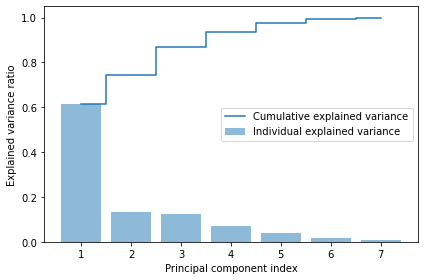

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1, 8), var_exp, alpha=0.5, align='center',
        label='Individual explained variance')
plt.step(range(1, 8), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

* The resulting plot indicates that the first principal component alone accounts for approximately 60 percent of the variance. Also, we can see that the first two principal components combined explain over 70 percent of the variance in the dataset.

Now that we have successfully decomposed the covariance matrix into eigenpairs, let's transform the heptathlon dataset onto the new 
principal component axes. 

* Select $k$ eigenvectors, which correspond to the $k$ largest eigenvalues, where $k$ is the dimensionality of the new feature subspace ($𝑘 \leq 𝑑$).
* Construct a projection matrix $\mathbf W$, from the "top" $k$ eigenvectors.
* Transform the d-dimensional input dataset, $\mathbf X$, using the projection matrix $\mathbf W$, to obtain the new k-dimensional feature subspace.

We start by sorting the eigenpairs by decreasing order of the eigenvalues:

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

Matrix W:
 [[-0.46220247  0.04191662]
 [ 0.26967404  0.78403415]
 [ 0.3902146  -0.15594611]
 [-0.44586539  0.14259219]
 [ 0.44997991  0.04081014]
 [ 0.22498454  0.32526376]
 [-0.3308798   0.48106106]]


Using the projection matrix, we can now transform an example, $\mathbf{x}$ (represented as a 7-dimensional row vector), onto the PCA subspace (the principal components one and two) obtaining $\mathbf{x}'$, now a two-dimensional example vector consisting of two new features:

$$\mathbf{x}' = \mathbf{x}\mathbf{W}$$

In [ ]:
X_train_std[0]

array([ 1.69893781, -1.63869298, -1.76711201,  2.20262325, -1.74713786,
       -0.72656592,  0.71433928])

In [ ]:
X_train_std[0].dot(w)

array([-4.08479607, -0.58791212])

Similarly, we can transform the entire 17 × 7-dimensional training dataset onto the two principal components by calculating the matrix dot product:

$$\mathbf{X}' = \mathbf{X}\mathbf{W}$$

In [ ]:
X_train_pca = X_train_std.dot(w)

In [ ]:
X_train_std.shape, w.shape, X_train_pca.shape

((17, 7), (7, 2), (17, 2))

Finally, it's time to visualize the transformed heptathlon training set, now stored as an 17×2 matrix, in a two-dimensional scatterplot:

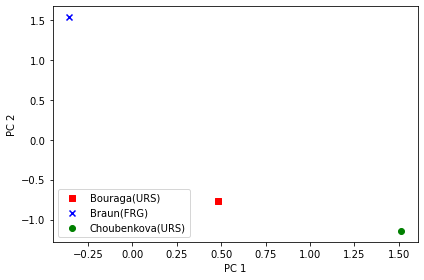

In [ ]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

The following four code cells help us to illustrate how to replicate the results from our own PCA implementation in scikit-learn:

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
# fit_transform() to calculate the coordinate system
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.61356057, 0.13097236, 0.12432909, 0.06841332, 0.04058986,
       0.01486526, 0.00726954])

* We can clearly see that the first two principal components explains over 70% of the variation in the data.

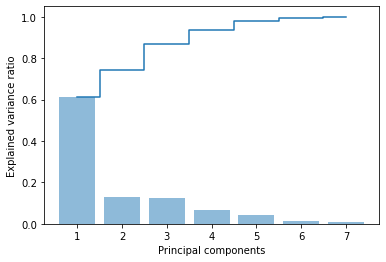

In [ ]:
plt.bar(range(1, 8), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 8), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [ ]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

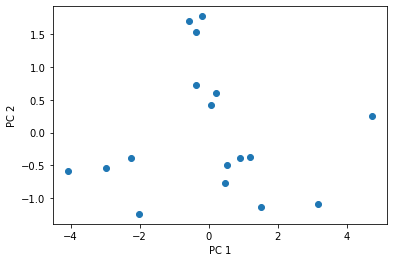

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

The `PCA` class is another one of scikit-learn's transformer classes, where we first fit the model using the training data before we transform both the training data and the test dataset using the same model parameters. Now, let's use the `PCA` class from scikit-learn on the Wine training dataset, classify the transformed examples via logistic regression, and visualize the decision regions via the `plot_decision_regions` function.

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot examples by class
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

In [ ]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)

By executing the preceding code, we should now see the decision regions for the training data reduced to two principal component axes:

In [ ]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.61356057, 0.13097236, 0.12432909, 0.06841332, 0.04058986,
       0.01486526, 0.00726954])

Note that we set `n_components=None` when we initialized the `PCA` class so that it will return all principal components in a sorted order, instead of performing a dimensionality reduction.


<br>

<br>


## Discriminant Analysis

**Swiss Banknote data**

* Description: the data set contain 6 measures of 100 genuine and 100 counterfeit Swiss franc banknotes.

* Status: genuine or counterfeit

* Features

    Length: Length of bill ($mm$)

    Left: Width of left edge ($mm$)

    Right: Width of right edge ($mm$)

    Bottom: Bottom margin width ($mm$)

    Top: Top margin width ($mm$)

    Diagonal: Length of diagonal ($mm$)

First, we will start by loading the dataset.

In [ ]:
import pandas as pd

df_Swbank = pd.read_table('F:/2020.2/Data Mining/HW/HM3 12.13/스위스은행지폐데이터.txt',delimiter='\s+', index_col=False)

In [ ]:
df_Swbank

,Length,HeightLeft,HeightRight,InnerFrameLower,InnerFrameUppper,Diagonal,class
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1
...,...,...,...,...,...,...,...
195,215.0,130.4,130.3,9.9,12.1,139.6,2
196,215.1,130.3,129.9,10.3,11.5,139.7,2
197,214.8,130.3,130.4,10.6,11.1,140.0,2
198,214.7,130.7,130.8,11.2,11.2,139.4,2


In [ ]:
df_Swbank.shape

(200, 7)

In [ ]:
df_Swbank.head()

,Length,HeightLeft,HeightRight,InnerFrameLower,InnerFrameUppper,Diagonal,class
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


Next, we will process the data into separate training and test datasets using 70% and 30% of the data, respectively, and standardize it to unit variance.

In [ ]:
from sklearn.model_selection import train_test_split

X, y = df_Swbank.iloc[:, :-1].values, df_Swbank.iloc[:, 6].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, 
                     random_state=0)

In [ ]:
X

array([[214.8, 131. , 131.1,   9. ,   9.7, 141. ],
       [214.6, 129.7, 129.7,   8.1,   9.5, 141.7],
       [214.8, 129.7, 129.7,   8.7,   9.6, 142.2],
       ...,
       [214.8, 130.3, 130.4,  10.6,  11.1, 140. ],
       [214.7, 130.7, 130.8,  11.2,  11.2, 139.4],
       [214.3, 129.9, 129.9,  10.2,  11.5, 139.6]])

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

Then, we standardize the features of the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Computing the scatter matrices

Now we start the calculation of the mean vectors, which we will use to construct the within-class scatter matrix and between-class scatter matrix, respectively. Each mean vector, $\mathbf{m}_{i}$, stores the mean feature value, $\mu_{m}$, with respect to the examples of class $i$:

$$\mathbf{m}_{i} = \frac{1}{n_{i}}\sum_{\mathbf{x \in D_{i}}}\mathbf{x}_{m}$$

This results in two mean vectors:

$$\mathbf{m}_{i} = \left[ \begin{array} {c} \mu_{i, Length} \\ \mu_{i, HeightLeft} \\ ... \\ \mu_{i, Diagonal} \end{array}\right]^{T}, i \in \left\{ 1, 2 \right\}$$

In [ ]:
# Calculate the mean vectors for each class:
np.set_printoptions(precision=4)

mean_vecs = []
for label in range(1, 3):
    mean_vecs.append(np.mean(X_train_std[y_train == label], axis=0))
    print('MV %s: %s\n' % (label, mean_vecs[label - 1]))

MV 1: [ 0.1478 -0.4545 -0.55   -0.776  -0.6095  0.8916]

MV 2: [-0.1521  0.4677  0.5659  0.7985  0.6272 -0.9174]



Using the mean vectors, we can now compute the within-class scatter matrix, $\mathbf{S}_{W}$:

$$\mathbf{S}_{W} = \sum_{i=1}^{c}\mathbf{S}_{i}$$

This is calculated by summing up the individual scatter matrices, $\mathbf{S}_{i}$, of each individual class $i$:

$$\mathbf{S}_{i} = \sum_{\mathbf{x \in D_{i}}}(\mathbf{x} - \mathbf{m}_{i})(\mathbf{x} - \mathbf{m}_{i})^{T}$$

In [ ]:
# Compute the within-class scatter matrix:
d = 6 # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 3), mean_vecs):
    class_scatter = np.zeros((d, d))  # scatter matrix for each class
    for row in X_train_std[y_train == label]:
        row, mv = row.reshape(d, 1), mv.reshape(d, 1)  # make column vectors
        class_scatter += (row - mv).dot((row - mv).T)
    S_W += class_scatter                          # sum class scatter matrices

print('Within-class scatter matrix: %sx%s' % (S_W.shape[0], S_W.shape[1]))

Within-class scatter matrix: 6x6


In [ ]:
S_W

array([[136.8537,  48.3409,  42.3956, -13.3768,   9.1547,  -0.1947],
       [ 48.3409, 110.241 ,  66.2276,   0.867 ,  16.0462, -11.5939],
       [ 42.3956,  66.2276,  96.4247,   1.8573,  14.7202,   0.7598],
       [-13.3768,   0.867 ,   1.8573,  53.2455, -39.1086,   5.5219],
       [  9.1547,  16.0462,  14.7202, -39.1086,  86.4794,  -4.204 ],
       [ -0.1947, -11.5939,   0.7598,   5.5219,  -4.204 ,  25.484 ]])

The assumption that we are making when we are computing the scatter matrices is that the class labels in the training dataset are uniformly distributed. However, if we print the number of class labels, we see that this assumption is violated:

In [ ]:
# covariance matrix since classes are not equally distributed:
print('Class label distribution: %s' 
      % np.bincount(y_train)[1:])

Class label distribution: [71 69]


Thus, we want to scale the individual scatter matrices, $\mathbf{S}_{i}$, before we sum them up as scatter matrix $\mathbf{S}_{W}$. When we divide the scatter matrices by the number of class-examples, $n_{i}$, we can see that computing the scatter matrix is in fact the same as computing the covariance matrix, $\sum_{i}$—the covariance matrix is a normalized version of the scatter matrix:

$${\sum}_{i} = \frac{1}{n_{i}}\mathbf{S}_{i} = \frac{1}{n_{i}} \sum_{\mathbf{x \in D_{i}}}(\mathbf{x} - \mathbf{m}_{i})(\mathbf{x} - \mathbf{m}_{i})^{T}$$

The code for computing the scaled within-class scatter matrix is as follows:

In [ ]:
d = 6  # number of features
S_W = np.zeros((d, d))
for label, mv in zip(range(1, 3), mean_vecs):
    class_scatter = np.cov(X_train_std[y_train == label].T)
    S_W += class_scatter
print('Scaled within-class scatter matrix: %sx%s' % (S_W.shape[0],
                                                     S_W.shape[1]))

Scaled within-class scatter matrix: 6x6


In [ ]:
S_W

array([[ 1.9822,  0.7001,  0.6126, -0.1996,  0.1331, -0.0039],
       [ 0.7001,  1.5901,  0.9556,  0.0091,  0.2294, -0.1663],
       [ 0.6126,  0.9556,  1.3933,  0.0243,  0.2118,  0.0131],
       [-0.1996,  0.0091,  0.0243,  0.7776, -0.5694,  0.0814],
       [ 0.1331,  0.2294,  0.2118, -0.5694,  1.2525, -0.0593],
       [-0.0039, -0.1663,  0.0131,  0.0814, -0.0593,  0.3698]])

After we compute the scaled within-class scatter matrix (or covariance matrix), we can move on to the next step and compute the between-class scatter matrix $\mathbf{S}_{B}$:

$$\mathbf{S}_{B} = \sum_{i=1}^{c}n_{i}(\mathbf{m}_{i} - \mathbf{m})(\mathbf{m}_{i} - \mathbf{m})^{T}$$

Here, $\mathbf{m}$ is the overall mean that is computed, including examples from all $c$ classes:

In [ ]:
# Compute the between-class scatter matrix:
mean_overall = np.mean(X_train_std, axis=0)
d = 6  # number of features
S_B = np.zeros((d, d))
for i, mean_vec in enumerate(mean_vecs):
    n = X_train_std[y_train == i + 1, :].shape[0]
    mean_vec = mean_vec.reshape(d, 1)  # make column vector
    mean_overall = mean_overall.reshape(d, 1)  # make column vector
    S_B += n * (mean_vec - mean_overall).dot((mean_vec - mean_overall).T)

print('Between-class scatter matrix: %sx%s' % (S_B.shape[0], S_B.shape[1]))

Between-class scatter matrix: 6x6


In [ ]:
S_B

array([[  3.1463,  -9.6763, -11.709 , -16.5213, -12.9765,  18.9815],
       [ -9.6763,  29.759 ,  36.0105,  50.8107,  39.9089, -58.3771],
       [-11.709 ,  36.0105,  43.5753,  61.4846,  48.2926, -70.6404],
       [-16.5213,  50.8107,  61.4846,  86.7545,  68.1407, -99.6734],
       [-12.9765,  39.9089,  48.2926,  68.1407,  53.5206, -78.2877],
       [ 18.9815, -58.3771, -70.6404, -99.6734, -78.2877, 114.516 ]])

### Selecting linear discriminants for the new feature subspace
The remaining steps of the LDA are similar to the steps of the PCA. However, instead of performing the eigendecomposition on the covariance matrix, we solve the generalized eigenvalue problem of the matrix, $\mathbf{S}_W^{-1}\mathbf{S}_B$:

In [ ]:
# Solve the generalized eigenvalue problem for the matrix (S_W)^(-1)*S_B
eigen_vals, eigen_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_B))

**Note**:
    
Above, I used the [`numpy.linalg.eig`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html) function to decompose the symmetric covariance matrix into its eigenvalues and eigenvectors.
    <pre>>>> eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)</pre>
    This is not really a "mistake," but probably suboptimal. It would be better to use [`numpy.linalg.eigh`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eigh.html) in such cases, which has been designed for [Hermetian matrices](https://en.wikipedia.org/wiki/Hermitian_matrix). The latter always returns real  eigenvalues; whereas the numerically less stable `np.linalg.eig` can decompose nonsymmetric square matrices, you may find that it returns complex eigenvalues in certain cases. (S.R.)


After we compute the eigenpairs, we can sort the eigenvalues in descending order:

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues

print('Eigenvalues in descending order:\n')
for eigen_val in eigen_pairs:
    print(eigen_val[0])

Eigenvalues in descending order:

778.7966630044352
1.1511987258796897e-13
8.585891715478733e-14
2.9648166918389664e-14
1.707625201855453e-14
0.0


In [ ]:
eigen_pairs

[(778.7966630044352,
  array([ 0.0281, -0.1497,  0.1291,  0.5708,  0.3444, -0.7181])),
 (1.1511987258796897e-13,
  array([ 0.0402,  0.8946,  0.03  , -0.064 , -0.4217,  0.1239])),
 (8.585891715478733e-14,
  array([-0.0027, -0.0692,  0.1065, -0.5977, -0.334 , -0.7177])),
 (2.9648166918389664e-14,
  array([-0.0813, -0.5922, -0.4336,  0.5547, -0.2785, -0.2634])),
 (1.707625201855453e-14,
  array([ 0.0833,  0.541 ,  0.6356, -0.4906,  0.0127,  0.2358])),
 (0.0, array([-0.9936,  0.017 , -0.0146, -0.0647, -0.039 ,  0.0814]))]

In LDA, the number of linear discriminants is at most $c$−1, where $c$ is the number of class labels, since the in-between scatter matrix, $\mathbf{S}_{B}$, is the sum of $c$ matrices with rank one or less. We can indeed see that we only have two nonzero eigenvalues (the eigenvalues 3-6 are not exactly zero, but this is due to the floating-point arithmetic in NumPy).

To measure how much of the class-discriminatory information is captured by the linear discriminants (eigenvectors), let's plot the linear discriminants by decreasing eigenvalues, similar to the explained variance plot that we created in the PCA section. For simplicity, we will call the content of class-discriminatory information discriminability:

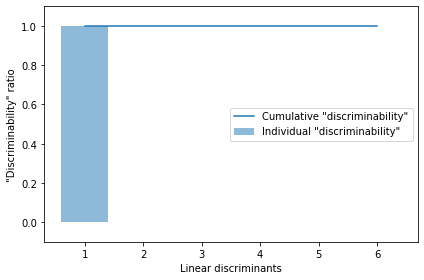

In [ ]:
tot = sum(eigen_vals.real)
discr = [(i / tot) for i in sorted(eigen_vals.real, reverse=True)]
cum_discr = np.cumsum(discr)

plt.bar(range(1, 7), discr, alpha=0.5, align='center',
        label='Individual "discriminability"')
plt.step(range(1, 7), cum_discr, where='mid',
         label='Cumulative "discriminability"')
plt.ylabel('"Discriminability" ratio')
plt.xlabel('Linear discriminants')
plt.ylim([-0.1, 1.1])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/05_07.png', dpi=300)
plt.show()

* As we can see in the resulting figure, the first linear discriminant alone capture 100 percent of the useful information in the training dataset.

### Projecting examples onto the new feature space
Using the transformation matrix, $\mathbf{W}$, that we created in the previous subsection, we can now transform the training dataset by multiplying the matrices:

$$\mathbf{X}' = \mathbf{XW}$$

In [ ]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis].real,
              eigen_pairs[1][1][:, np.newaxis].real))
print('Matrix W:\n', w)

Matrix W:
 [[ 0.0281  0.0402]
 [-0.1497  0.8946]
 [ 0.1291  0.03  ]
 [ 0.5708 -0.064 ]
 [ 0.3444 -0.4217]
 [-0.7181  0.1239]]


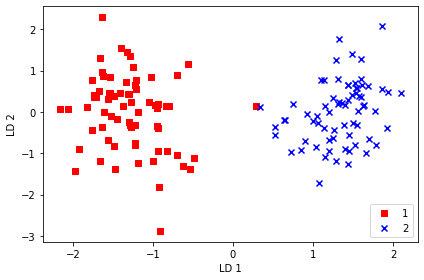

In [ ]:
X_train_lda = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_lda[y_train == l, 0],
                X_train_lda[y_train == l, 1] * (-1),
                c=c, label=l, marker=m)

plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Execute random forest regression to calculate and evaluate the feature importance

Feature: 0, Score: 0.00044
Feature: 1, Score: 0.00250
Feature: 2, Score: 0.00159
Feature: 3, Score: 0.00604
Feature: 4, Score: 0.00844
Feature: 5, Score: 0.98098


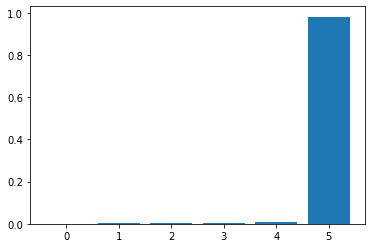

In [ ]:
# random forest for feature importance on a regression problemfrom sklearn.datasets import make_regression

from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

# define the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

* The results suggest perhaps one of the 6 features as being important to prediction, and the important feature is `Diagonal`.